In [1]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import os
import pandas as pd
import numpy as np
import seaborn as sns

from grafi import (
    display_error_tables,
    display_winddir_met,
    display_cosine,
    plot_metric_res_2,
    plot_metric_res,
    plot_wind_speed_comparison,
    plot_week_comparison_with_dates,
    plot_wind_direction_comparison_bezigrad,
    plot_wind_speed_error_by_hour_multistation,
    plot_wind_speed_error_by_month_all_stations,
    plot_wind_errors_all_stations,
    plot_wdir_error_by_wspeed_all_stations,
    plot_absolute_wind_speed_error_windrose,
    compare_wind_plots_for_stations,
    plot_wind_speed_error_windrose,
    plot_absolute_wind_direction_error_windrose,
    plot_wind_direction_error_windrose,
    display_error_tables_comparison,
    display_cosine_two_models,
    display_winddir_two_models,
    compare_wind_plots_models,
)
from utils import (
    finalize_df,
    evaluate_model,
    prepare_observations,
    get_model_stations_data,
    get_model_stations_data_cdf
)
from postaje import (
    get_stations, get_names
)

In [2]:
sns.set_theme(context='notebook', style='darkgrid', palette='deep', font='sans-serif', font_scale=1, color_codes=True, rc=None)

In [3]:
base_path = "C:\\Users\\alex\\Desktop\\veter_data"

if not os.path.exists(base_path):
    print(f"{base_path} ne obstaja")

In [4]:
# meteopgt2021.all
file_2021 = os.path.join(base_path, 'meteopgt2021.all')
meteopgt_2021 = prepare_observations(file_2021, 2021)

# meteopgt2023.all
file_2023 = os.path.join(base_path, 'meteopgt2023.all')
meteopgt_2023 = prepare_observations(file_2023, 2023)

In [5]:
base_path_250_2021 = os.path.join(base_path, "VeterPodatkiARSO", "WND_ASCII")
if not os.path.exists(base_path_250_2021):
    print(f"{base_path_250_2021}' ne obstja")
stations = get_stations()
stations = get_model_stations_data(base_path_250_2021, stations, "025km_2021")
df_250_2021 = finalize_df(meteopgt_2021, stations)
results_250_2021 = evaluate_model(stations, df_250_2021)

loaded


In [6]:
name = "2aladinGRAMM2021.nc"
base_path_44_2021 = os.path.join(base_path, name)
if not os.path.exists(base_path_44_2021):
    print(f"{base_path_44_2021}' ne obstja")
stations = get_stations()
stations = get_model_stations_data_cdf(base_path_44_2021, stations, "44km_2021")
df_44_2021 = finalize_df(meteopgt_2021, stations)
results_44_2021 = evaluate_model(stations, df_44_2021)

name = "aladinGRAMM2023.nc"
base_path_44_2023 = os.path.join(base_path, name)
if not os.path.exists(base_path_44_2023):
    print(f"{base_path_44_2023}' ne obstja")
stations = get_stations()
stations = get_model_stations_data_cdf(base_path_44_2023, stations, "44km_2023")
df_44_2023 = finalize_df(meteopgt_2023, stations)
results_44_2023 = evaluate_model(stations, df_44_2023)

loaded
loaded


In [7]:
names = get_names()

In [8]:
df_both = pd.concat([df_44_2021, df_44_2023])
results_44_both = evaluate_model(stations, df_both)
# print(results_44_both)
# print(results_250_2021)

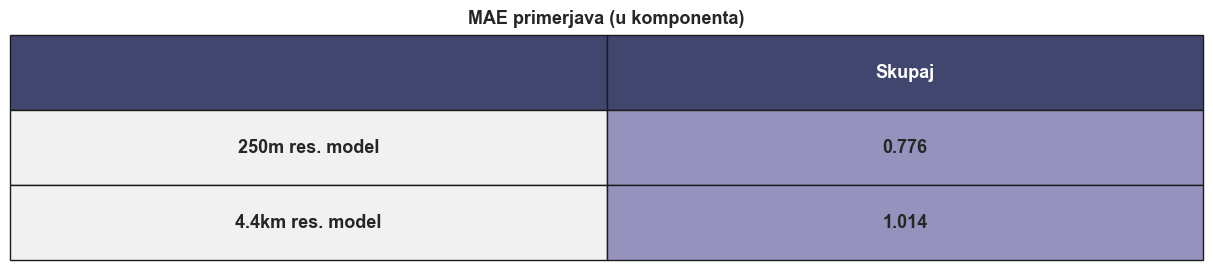

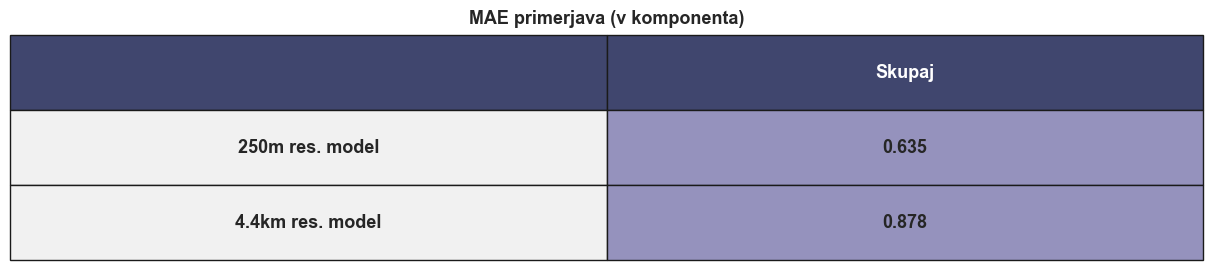

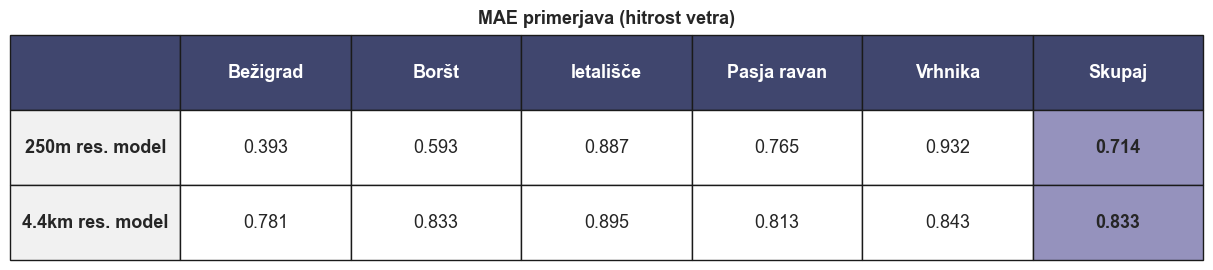

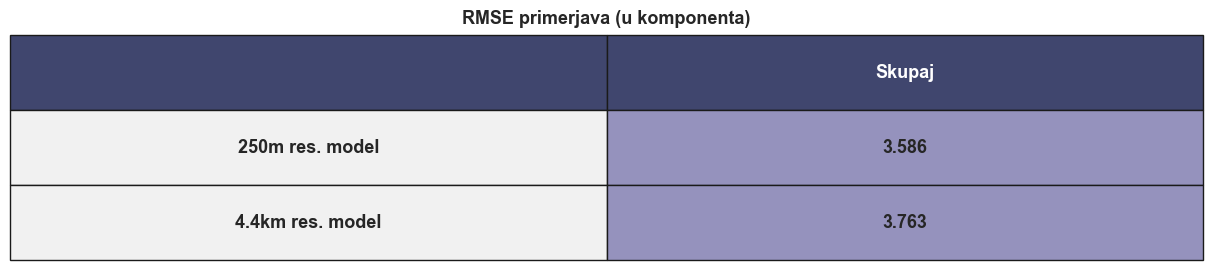

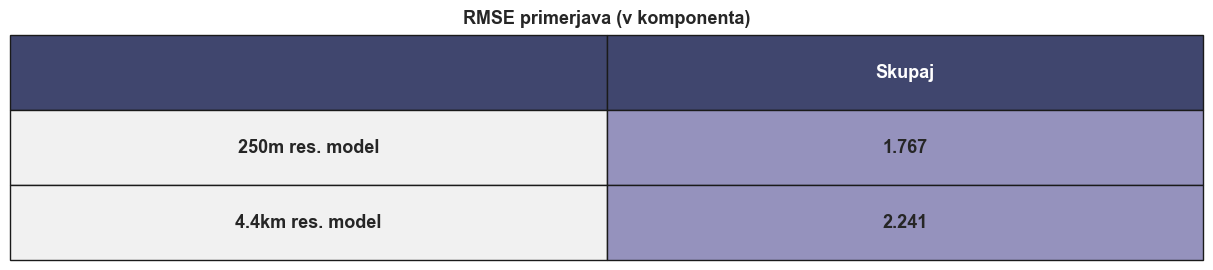

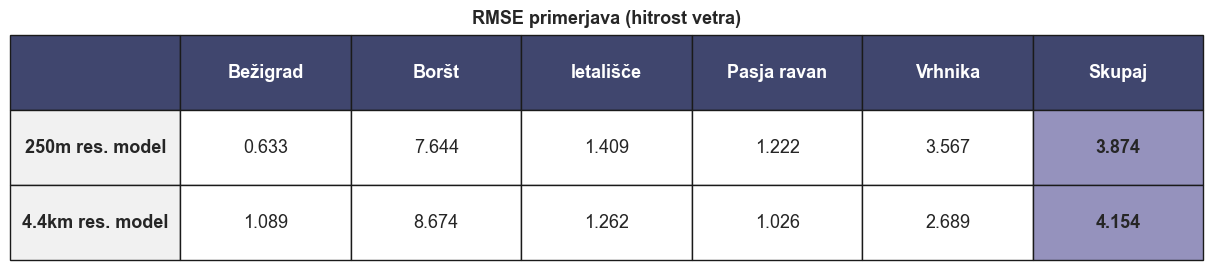

In [9]:
display_error_tables_comparison(
    results_df1=results_250_2021,
    results_df2=results_44_both,
    model1_name="250m res. model",
    model2_name="4.4km res. model",
    stations=[s for s in stations],
    n=names,
    show_only_total_for=["u", "v"]
)

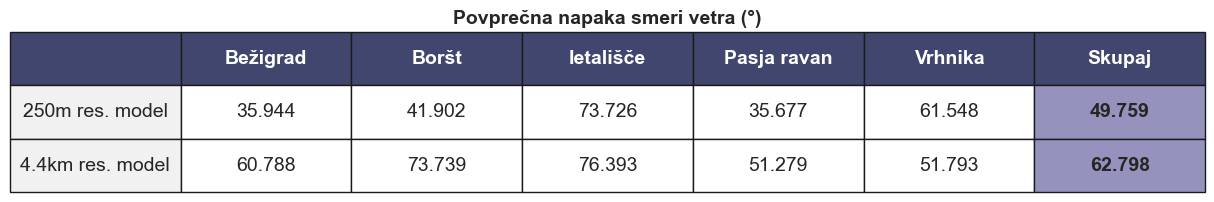

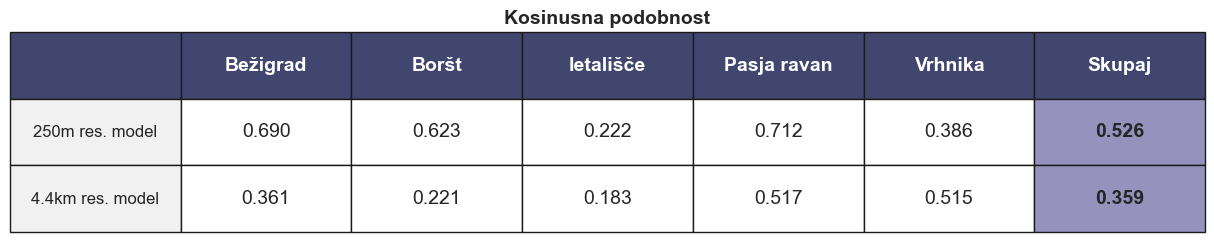

In [10]:
display_winddir_two_models(results_250_2021, results_44_both, model1_name="250m res. model", model2_name="4.4km res. model", stations=[s for s in stations], n=names)

display_cosine_two_models(results_250_2021, results_44_both, model1_name="250m res. model", model2_name="4.4km res. model", stations=[s for s in stations], n=names)

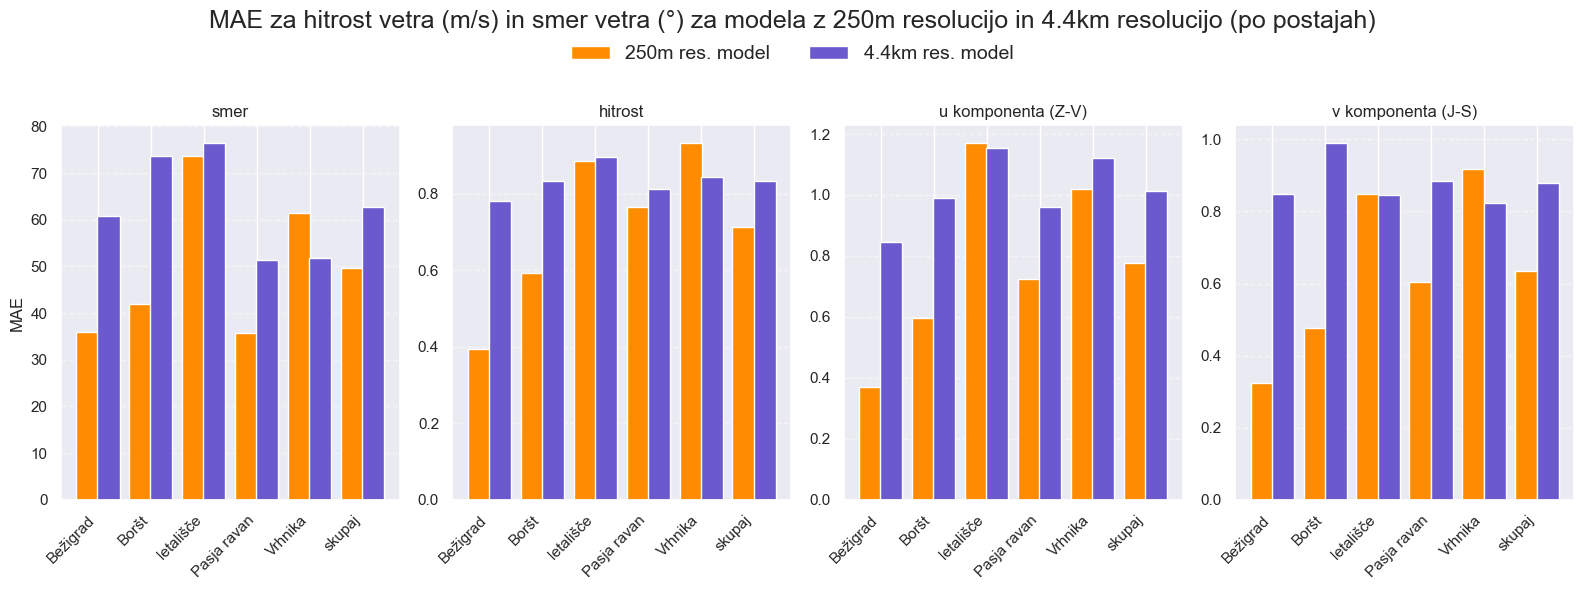

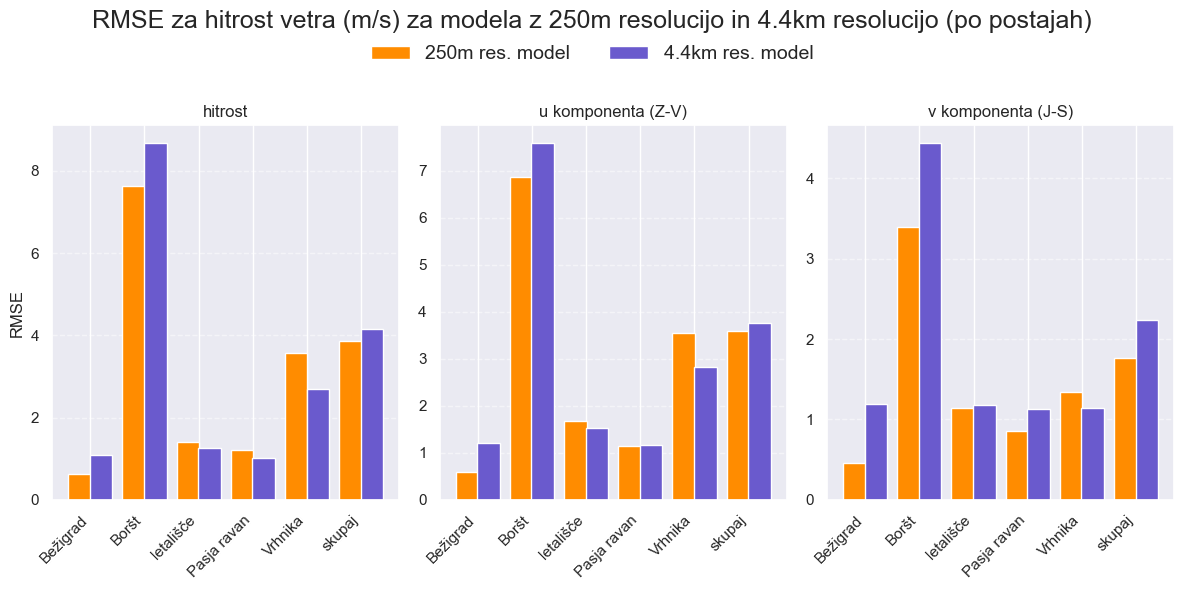

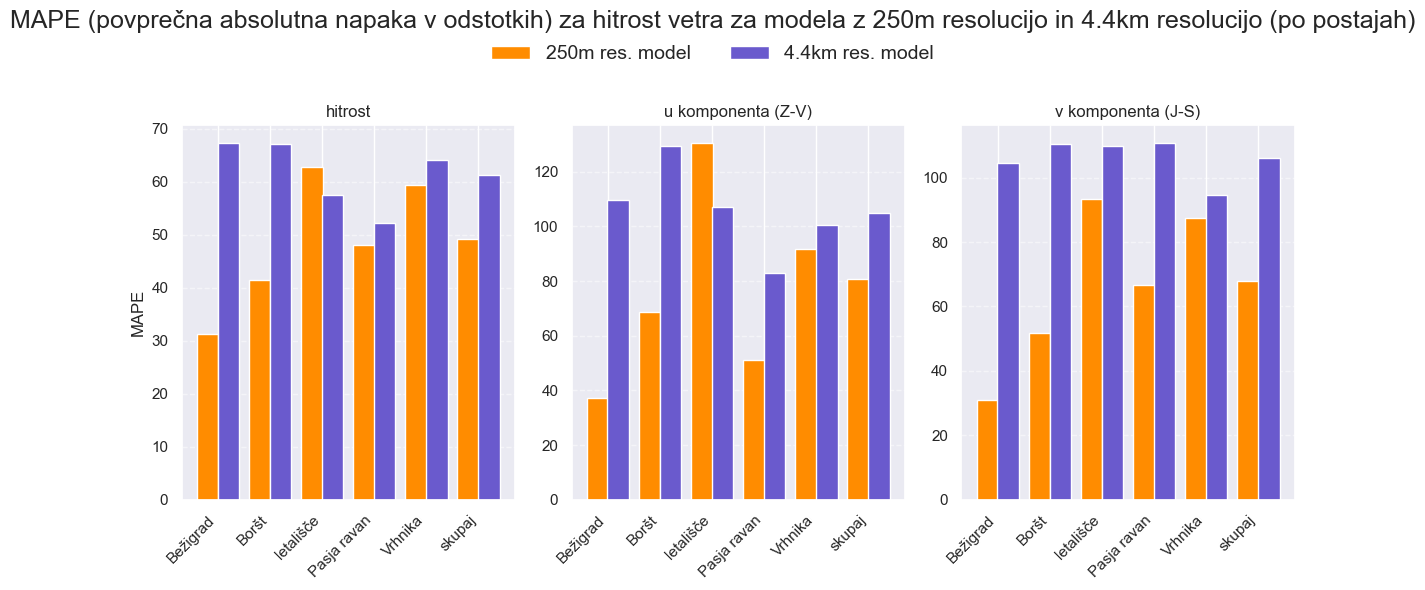

In [11]:
plot_metric_res_2(metric='MAE', df1=results_250_2021, df2=results_44_both, names=names, llabels=["250m res. model", "4.4km res. model"], title='MAE za hitrost vetra (m/s) in smer vetra (°) za modela z 250m resolucijo in 4.4km resolucijo (po postajah)')
plot_metric_res_2(metric='RMSE', df1=results_250_2021, df2=results_44_both, names=names, llabels=["250m res. model", "4.4km res. model"], title='RMSE za hitrost vetra (m/s) za modela z 250m resolucijo in 4.4km resolucijo (po postajah)', ign=["WDir"])
plot_metric_res_2(metric='MAPE', df1=results_250_2021, df2=results_44_both, names=names, llabels=["250m res. model", "4.4km res. model"], title='MAPE (povprečna absolutna napaka v odstotkih) za hitrost vetra za modela z 250m resolucijo in 4.4km resolucijo (po postajah)', ign=["WDir"])

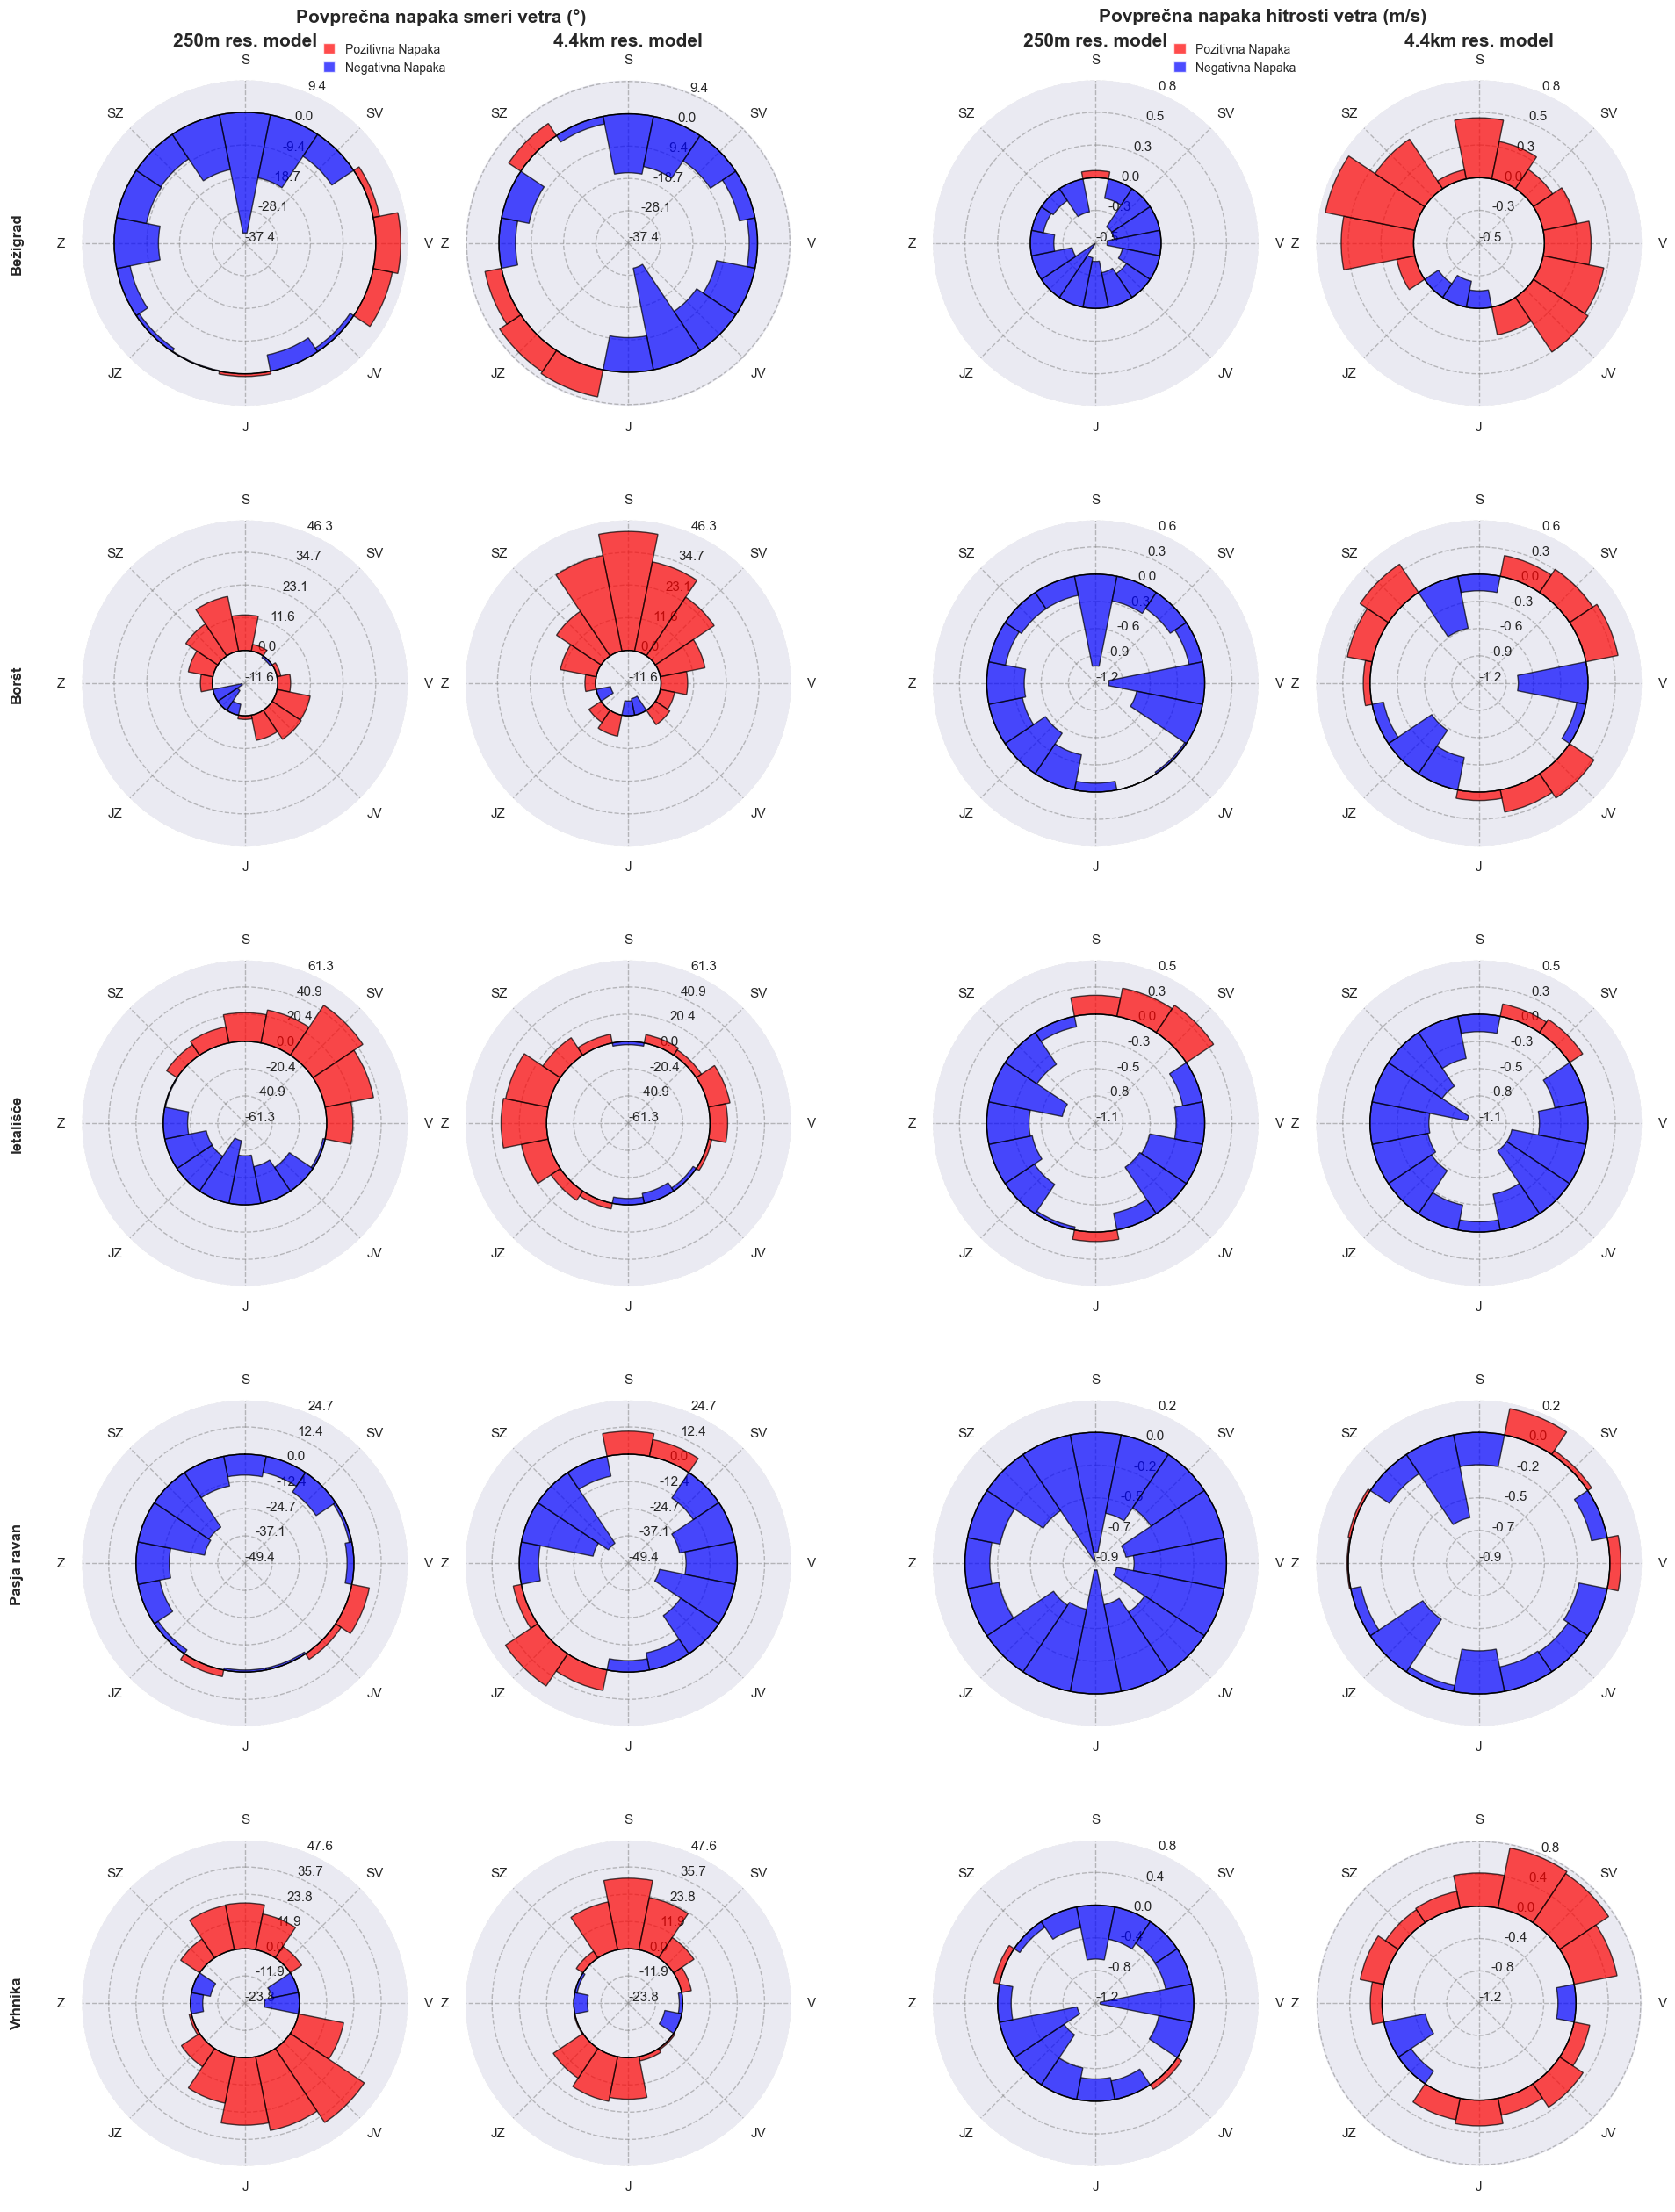

In [12]:
compare_wind_plots_models(df_250_2021, df_both, [s for s in stations])